<img width=1200 height=400    src="./Indian_ancient_tourism_2_cover.png"/>

<p style="font-size:25px; color:#496595">India by the Numbers: A Comprehensive Data Analysis</p>

In this notebook we will be analyzing data from the Workd Bank to get a better understanding of India's economy, population, and other metrices. We will be using the following dataset:

- [World Bank - Popular Country's Stats](https://databank.worldbank.org/country/IND/556d8fa6/Popular_countries#)

We will be looing at following aspects of India's economy:

- Indian Population from 2000 - 2022
- Contribution of Aggricultral Vs Industrial Vs Service to the GDP of India
- Import vs Export as a % of GDP
- GDP growth Vs GDP per Capita Grownth
- Military Expenditure as a % of GDP
- Food Exports Vs Food Imports
- Foreign direct investment, net inflows (BoP, current US$)
- People using at least basic drinking water services (% of population)
- People practicing open defecation (% of population)

Importing important libraries

```python

In [1]:
import pandas as pd
import numpy as np
import math
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib

plt.style.use('ggplot')
COLORS = plt.get_cmap('tab20').colors

Reading the data

In [2]:
df_stats = pd.read_csv('./P_Popular countries/India_stats.csv')

Let's check some sample records from the dataset

In [3]:
df_stats.head()

,Country Name,Country Code,Series Name,Series Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,19542982,19688632,21000256,22645130,23553551,24411191,...,31541209,32716210,33753499,34636207,35643418,36686784,37769499,38972230,40099462,41128771
1,Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,1.4438030241194,0.742516834396313,6.44932147797304,7.54101896480183,3.93317768847308,3.57650800354462,...,3.46678830410982,3.65757606530364,3.12134122890873,2.58154939895659,2.86649214750073,2.88520797304849,2.90852909268743,3.13474690779163,2.85135765449931,2.53449831666733
2,Afghanistan,AFG,Surface area (sq. km),AG.SRF.TOTL.K2,652860,652860,652860,652860,652860,652860,...,652860,652860,652860,652860,652860,652860,652860,652860,652860,..
3,Afghanistan,AFG,Poverty headcount ratio at national poverty li...,SI.POV.NAHC,..,..,..,..,..,..,...,..,..,..,54.5,..,..,..,..,..,..
4,Afghanistan,AFG,"GNI, Atlas method (current US$)",NY.GNP.ATLS.CD,..,..,..,..,..,..,...,21470122856.3706,21234423666.2249,20638641198.2215,19654778152.1857,19354257378.8281,19181219740.1204,19937408347.6267,19499274522.6982,15623561711.1099,..


In [4]:
col_names = pd.Series(df_stats.columns).apply(lambda x: x.strip().replace(' ', '_').lower() if x.find('[') == -1 else x.strip().split(' ')[0]).values

Let's rename the columns to make it more readable

In [5]:
df_stats.columns = col_names
df_stats.head()

,country_name,country_code,series_name,series_code,2000,2001,2002,2003,2004,2005,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,19542982,19688632,21000256,22645130,23553551,24411191,...,31541209,32716210,33753499,34636207,35643418,36686784,37769499,38972230,40099462,41128771
1,Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,1.4438030241194,0.742516834396313,6.44932147797304,7.54101896480183,3.93317768847308,3.57650800354462,...,3.46678830410982,3.65757606530364,3.12134122890873,2.58154939895659,2.86649214750073,2.88520797304849,2.90852909268743,3.13474690779163,2.85135765449931,2.53449831666733
2,Afghanistan,AFG,Surface area (sq. km),AG.SRF.TOTL.K2,652860,652860,652860,652860,652860,652860,...,652860,652860,652860,652860,652860,652860,652860,652860,652860,..
3,Afghanistan,AFG,Poverty headcount ratio at national poverty li...,SI.POV.NAHC,..,..,..,..,..,..,...,..,..,..,54.5,..,..,..,..,..,..
4,Afghanistan,AFG,"GNI, Atlas method (current US$)",NY.GNP.ATLS.CD,..,..,..,..,..,..,...,21470122856.3706,21234423666.2249,20638641198.2215,19654778152.1857,19354257378.8281,19181219740.1204,19937408347.6267,19499274522.6982,15623561711.1099,..


Selecting only India's data for our analysis

In [6]:
df_stats_ind = df_stats[df_stats['country_name'] == 'India']
df_stats_ind.shape

(122, 27)

In [7]:
df_stats_ind.head()

,country_name,country_code,series_name,series_code,2000,2001,2002,2003,2004,2005,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
10560,India,IND,"Population, total",SP.POP.TOTL,1059633675,1078970907,1098313039,1117415123,1136264583,1154638713,...,1291132063,1307246509,1322866505,1338636340,1354195680,1369003306,1383112050,1396387127,1407563842,1417173173
10561,India,IND,Population growth (annual %),SP.POP.GROW,1.82218400218023,1.80844642123748,1.77676787418134,1.72426903226703,1.67281087022876,1.60412916927926,...,1.29754883539168,1.24036218382689,1.18779532005068,1.18504622906796,1.15562449067646,1.08752772157855,1.02531077187097,0.95522085775158,0.797216093898126,0.680372581057012
10562,India,IND,Surface area (sq. km),AG.SRF.TOTL.K2,3287260,3287260,3287260,3287260,3287260,3287260,...,3287260,3287260,3287260,3287260,3287260,3287260,3287260,3287260,3287260,..
10563,India,IND,Poverty headcount ratio at national poverty li...,SI.POV.NAHC,..,..,..,..,37.2,..,...,..,..,..,..,..,..,..,..,..,..
10564,India,IND,"GNI, Atlas method (current US$)",NY.GNP.ATLS.CD,467082097281.702,485442590011.091,500197978419.465,573893143642.804,687282161520.167,809085090886.068,...,1941116726990.66,2020998379216.56,2097598199310.03,2226423003454.8,2439593977287.58,2713329694951.9,2878536453270.38,2659600280128.38,3019856778493.94,3370147837589.91


Let's treat the missing values represented by '..' as NaN

In [8]:
df_stats_ind.replace('..', np.nan, inplace=True)
df_stats_ind.head()

/tmp/ipykernel_177509/470311478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stats_ind.replace('..', np.nan, inplace=True)


,country_name,country_code,series_name,series_code,2000,2001,2002,2003,2004,2005,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
10560,India,IND,"Population, total",SP.POP.TOTL,1059633675,1078970907,1098313039,1117415123,1136264583,1154638713,...,1291132063,1307246509,1322866505,1338636340,1354195680,1369003306,1383112050,1396387127,1407563842,1417173173
10561,India,IND,Population growth (annual %),SP.POP.GROW,1.82218400218023,1.80844642123748,1.77676787418134,1.72426903226703,1.67281087022876,1.60412916927926,...,1.29754883539168,1.24036218382689,1.18779532005068,1.18504622906796,1.15562449067646,1.08752772157855,1.02531077187097,0.95522085775158,0.797216093898126,0.680372581057012
10562,India,IND,Surface area (sq. km),AG.SRF.TOTL.K2,3287260,3287260,3287260,3287260,3287260,3287260,...,3287260,3287260,3287260,3287260,3287260,3287260,3287260,3287260,3287260,NaN
10563,India,IND,Poverty headcount ratio at national poverty li...,SI.POV.NAHC,NaN,NaN,NaN,NaN,37.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10564,India,IND,"GNI, Atlas method (current US$)",NY.GNP.ATLS.CD,467082097281.702,485442590011.091,500197978419.465,573893143642.804,687282161520.167,809085090886.068,...,1941116726990.66,2020998379216.56,2097598199310.03,2226423003454.8,2439593977287.58,2713329694951.9,2878536453270.38,2659600280128.38,3019856778493.94,3370147837589.91


In [9]:
df_stats_ind.isna().sum()

country_name     0
country_code     0
series_name      0
series_code      0
2000            14
2001            22
2002            22
2003            19
2004            22
2005            18
2006            16
2007            21
2008            18
2009            15
2010            14
2011            12
2012            16
2013            14
2014            13
2015            17
2016            23
2017            23
2018            24
2019            27
2020            31
2021            43
2022            85
dtype: int64

Droping the rows with NaN values

In [10]:
df_stats_ind_no_null = df_stats_ind.dropna(axis=0)

In [11]:
df_stats_ind_no_null.shape

(36, 27)

In [12]:
df_stats_ind_no_null.head()

,country_name,country_code,series_name,series_code,2000,2001,2002,2003,2004,2005,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
10560,India,IND,"Population, total",SP.POP.TOTL,1059633675,1078970907,1098313039,1117415123,1136264583,1154638713,...,1291132063,1307246509,1322866505,1338636340,1354195680,1369003306,1383112050,1396387127,1407563842,1417173173
10561,India,IND,Population growth (annual %),SP.POP.GROW,1.82218400218023,1.80844642123748,1.77676787418134,1.72426903226703,1.67281087022876,1.60412916927926,...,1.29754883539168,1.24036218382689,1.18779532005068,1.18504622906796,1.15562449067646,1.08752772157855,1.02531077187097,0.95522085775158,0.797216093898126,0.680372581057012
10564,India,IND,"GNI, Atlas method (current US$)",NY.GNP.ATLS.CD,467082097281.702,485442590011.091,500197978419.465,573893143642.804,687282161520.167,809085090886.068,...,1941116726990.66,2020998379216.56,2097598199310.03,2226423003454.8,2439593977287.58,2713329694951.9,2878536453270.38,2659600280128.38,3019856778493.94,3370147837589.91
10565,India,IND,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,440,450,460,510,600,700,...,1500,1550,1590,1660,1800,1980,2080,1900,2150,2380
10566,India,IND,"GNI, PPP (current international $)",NY.GNP.MKTP.PP.CD,2188197810596.11,2350069155229.51,2482413330516.74,2728406064236.69,3024818504447.73,3366286523961.53,...,6396857208684.85,6700838434194.09,7076731493413.66,7577059418948.02,8187427038374.48,8926347411981.02,9448744556227.71,8978916906284.87,10163358058763.2,11636782087950.8


We have below 36 stats with no missing values between 2000 - 2022

In [13]:
df_stats_ind_no_null.series_name.tolist()

['Population, total',
 'Population growth (annual %)',
 'GNI, Atlas method (current US$)',
 'GNI per capita, Atlas method (current US$)',
 'GNI, PPP (current international $)',
 'GNI per capita, PPP (current international $)',
 'GDP (current US$)',
 'GDP growth (annual %)',
 'Inflation, GDP deflator (annual %)',
 'Agriculture, forestry, and fishing, value added (% of GDP)',
 'Industry (including construction), value added (% of GDP)',
 'Exports of goods and services (% of GDP)',
 'Imports of goods and services (% of GDP)',
 'Gross capital formation (% of GDP)',
 'Military expenditure (% of GDP)',
 'Mobile cellular subscriptions (per 100 people)',
 'Merchandise trade (% of GDP)',
 'Personal remittances, paid (current US$)',
 'Foreign direct investment, net inflows (BoP, current US$)',
 'Agricultural raw materials exports (% of merchandise exports)',
 'Agricultural raw materials imports (% of merchandise imports)',
 'Agriculture, forestry, and fishing, value added (annual % growth)',
 'A

<p style="font-size:20px; color:#496595">Indian Population from 2000 - 2022</p>

In [14]:
df_pop = df_stats_ind_no_null[df_stats_ind_no_null.series_name.eq('Population, total')].iloc[:, 4:].T.squeeze().astype(int)

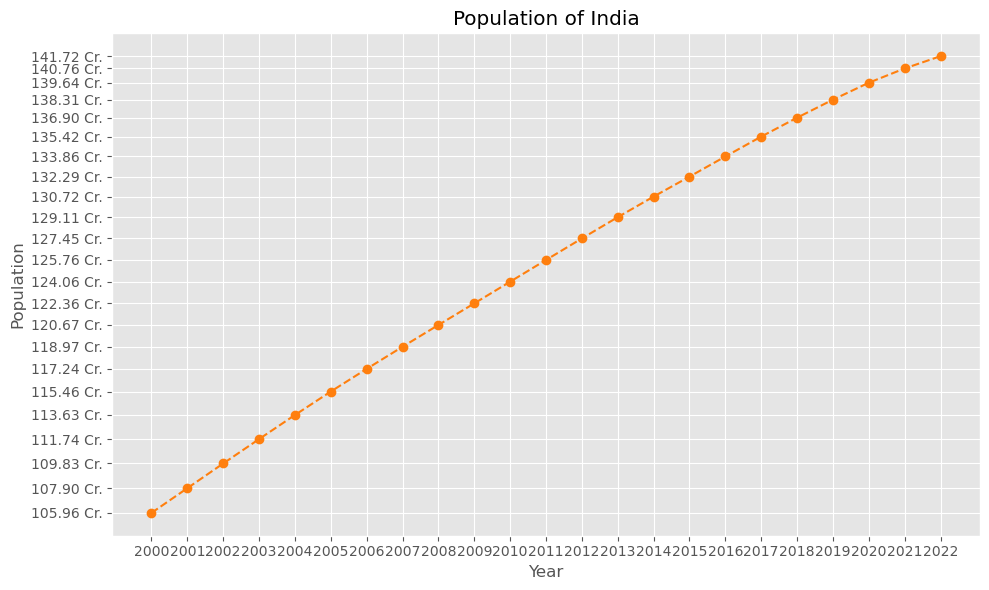

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_pop.index, df_pop.values, marker='o', linestyle='--', color=COLORS[2])
ax.set_title('Population of India')
ax.set_xlabel('Year')
ax.set_ylabel('Population')
ax.set_yticks(df_pop.values)
ax.set_yticklabels(['{:.2f} Cr.'.format(x/10000000) for x in ax.get_yticks().tolist()])
fig.tight_layout()
plt.show()

* We can see the population of India is increasing at a steady rate
* The population of India is close to 1.42 billion in 2022
* We can observe the rate of increase in population is decreasing after 2020

<p style="font-size:20px; color:#496595">Contribution of Aggricultral Vs Industrial Vs Service to the GDP of India</p>

In [16]:
df_agri = df_stats_ind_no_null[df_stats_ind_no_null.series_name.eq(r"Agriculture, forestry, and fishing, value added (% of GDP)")].iloc[:, 4:].T.squeeze().astype(float)

In [17]:
df_indus = df_stats_ind_no_null[df_stats_ind_no_null.series_name.eq(r"Industry (including construction), value added (% of GDP)")].iloc[:, 4:].T.squeeze().astype(float)

In [18]:
df_man = df_stats_ind_no_null[df_stats_ind_no_null.series_name.eq(r"Manufacturing, value added (% of GDP)")].iloc[:, 4:].T.squeeze().astype(float)

In [19]:
df_service = df_stats_ind_no_null[df_stats_ind_no_null.series_name.eq(r"Services, value added (% of GDP)")].iloc[:, 4:].T.squeeze().astype(float)

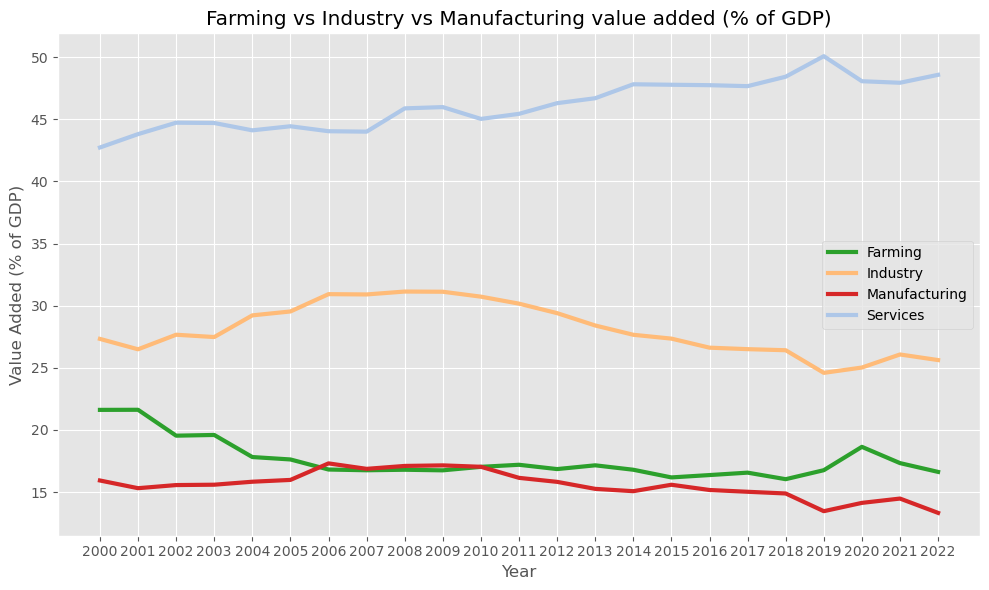

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df_agri.index, df_agri.values, color=COLORS[4], linewidth=3)
ax.plot(df_indus.index, df_indus.values, color=COLORS[3], linewidth=3)
ax.plot(df_man.index, df_man.values, color=COLORS[6], linewidth=3)
ax.plot(df_service.index, df_service.values, color=COLORS[1], linewidth=3)

ax.set_title(r'Farming vs Industry vs Manufacturing value added (% of GDP)')
ax.set_xlabel('Year')
ax.set_ylabel(r'Value Added (% of GDP)')
ax.legend(['Farming', 'Industry', 'Manufacturing', 'Services'])

fig.tight_layout()
plt.show()

* By looking at the above graph we can see that the service sector is the biggest contributor to the GDP of India
* One interesting thing to note is that the contribution of the Farming sector increased from 2018 to 2020, this could be due to the pandemic
* Manufacturing sector is the lowest contributor to the GDP of India

<p style="font-size:20px; color:#496595">Import vs Export as a % of GDP</p>

In [21]:
df_export = df_stats_ind_no_null[df_stats_ind_no_null.series_name.eq(r"Exports of goods and services (% of GDP)")].iloc[:, 4:].T.squeeze().astype(float)
df_import = df_stats_ind_no_null[df_stats_ind_no_null.series_name.eq(r"Imports of goods and services (% of GDP)")].iloc[:, 4:].T.squeeze().astype(float)

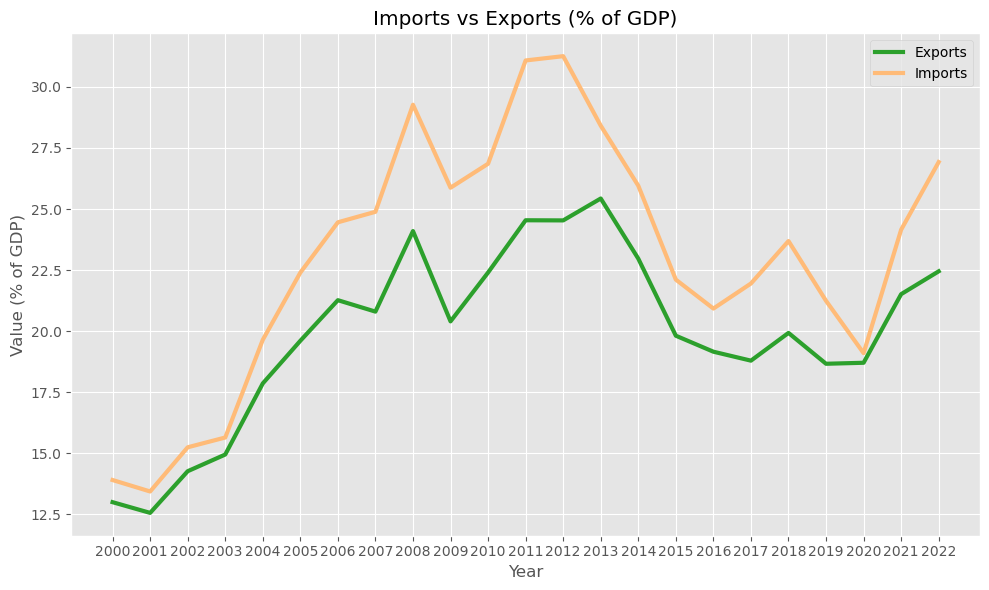

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df_export.index, df_export.values, color=COLORS[4], linewidth=3)
ax.plot(df_import.index, df_import.values, color=COLORS[3], linewidth=3)

ax.set_title(r'Imports vs Exports (% of GDP)')
ax.set_xlabel('Year')
ax.set_ylabel(r'Value (% of GDP)')
ax.legend(['Exports', 'Imports'])

fig.tight_layout()
plt.show()

* We can see that the import as a % of GDP is consistently higher than the export as a % of GDP
* Imports decreased drastically between 2012 and 2016
* We can see a similar trend in exports as well
* We can notice a significant increase in imports and exports after 2020, however imports increased more than exports

<p style="font-size:20px; color:#496595">GDP growth Vs GDP per Capita Grownth</p>



In [229]:
df_gdp_capita = df_stats_ind_no_null[df_stats_ind_no_null.series_name.eq(r"GDP per capita growth (annual %)")].iloc[:, 4:].astype(float)
df_gdp = df_stats_ind_no_null[df_stats_ind_no_null.series_name.eq(r"GDP growth (annual %)")].iloc[:, 4:].astype(float) 

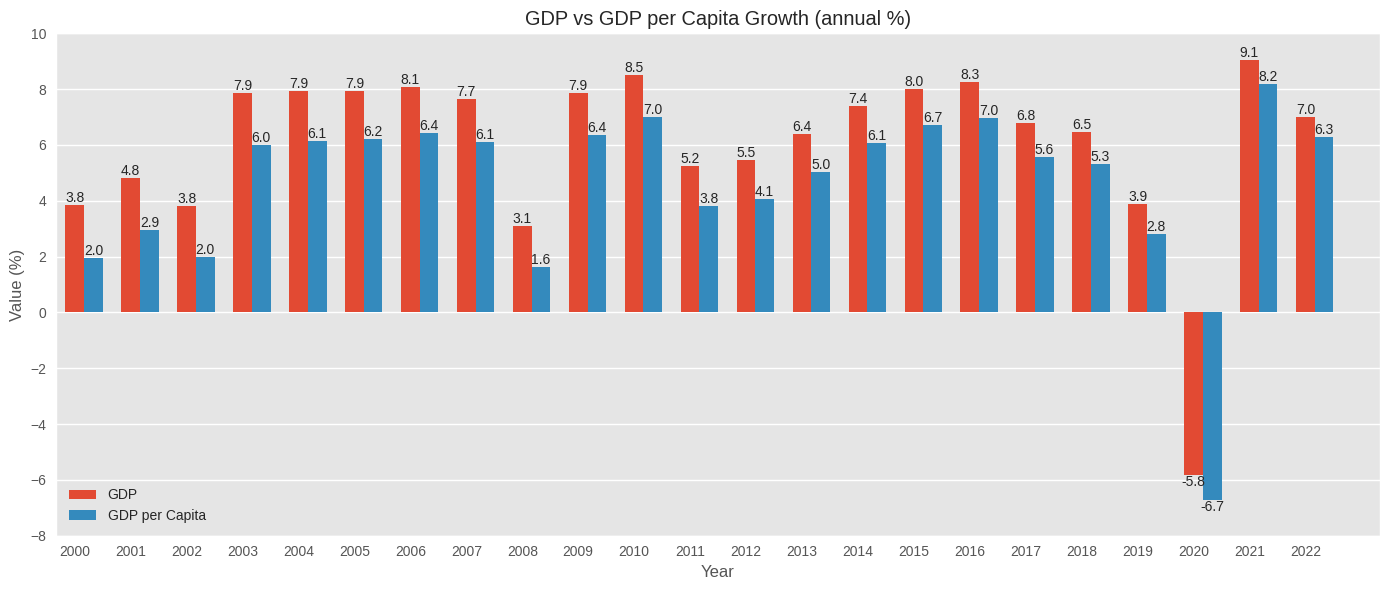

In [342]:
fig, ax = plt.subplots(figsize=(14, 6))
width = 1  # the width of the bars
multiplier = 0
x = np.arange(0,len(df_gdp.columns)*3,3) # the label locations)
for group, gdp in zip(["GDP", "GDP per Capita"], [df_gdp.values[0], df_gdp_capita.values[0]]):
    offset = width * multiplier
    rects1 = ax.bar(x + offset, gdp, width, label=group)
    multiplier += 1
    ax.bar_label(rects1, fmt='%0.1f', label_type='edge')
ax.set_title(r'GDP vs GDP per Capita Growth (annual %)')
ax.set_xlabel('Year')
ax.set_ylabel(r'Value (%)')
ax.legend(['GDP', 'GDP per Capita'], loc='lower left')
ax.set_ylim(-8, 10)
ax.set_xlim(-1, 70)
ax.set_xticks(x)
ax.set_xticklabels(df_gdp.columns)
ax.grid(axis='x', visible=False)
fig.tight_layout()
plt.show()

* We can see that the GDP growth rate is consistently higher than the GDP per capita growth rate
* We can see a recovery after the pandemic in 2020 but a significant decrease in 2022 by ~2%

<p style="font-size:20px; color:#496595">Military Expenditure as a % of GDP</p>



In [347]:
df_mil = df_stats_ind_no_null[df_stats_ind_no_null.series_name.eq(r"Military expenditure (% of GDP)")].iloc[:, 4:].T.squeeze().astype(float)

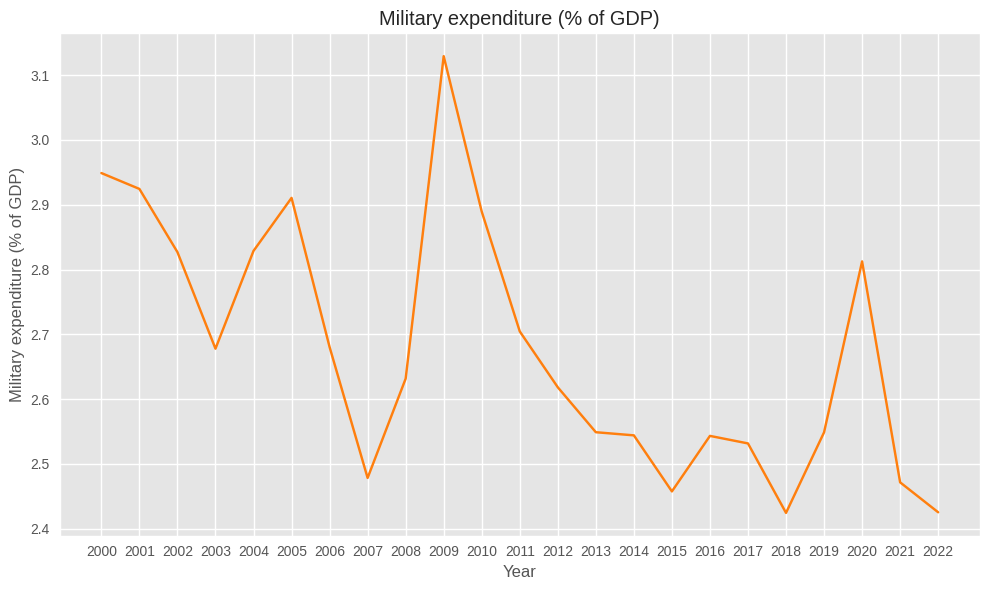

In [350]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_mil.index, df_mil.values, color=COLORS[2])
ax.set_title(r'Military expenditure (% of GDP)')
ax.set_xlabel('Year')
ax.set_ylabel(r'Military expenditure (% of GDP)')
fig.tight_layout()
plt.show()

* 2009 was the year when India spent the most on military as a % of GDP
* We can see that the military expenditure as a % of GDP is decreasing over the years

<p style="font-size:20px; color:#496595">Food Exports Vs Food Imports</p>


In [351]:
df_food_exp = df_stats_ind_no_null[df_stats_ind_no_null.series_name.eq(r"Food exports (% of merchandise exports)")].iloc[:, 4:].T.squeeze().astype(float)
df_food_imp = df_stats_ind_no_null[df_stats_ind_no_null.series_name.eq(r"Food imports (% of merchandise imports)")].iloc[:, 4:].T.squeeze().astype(float)

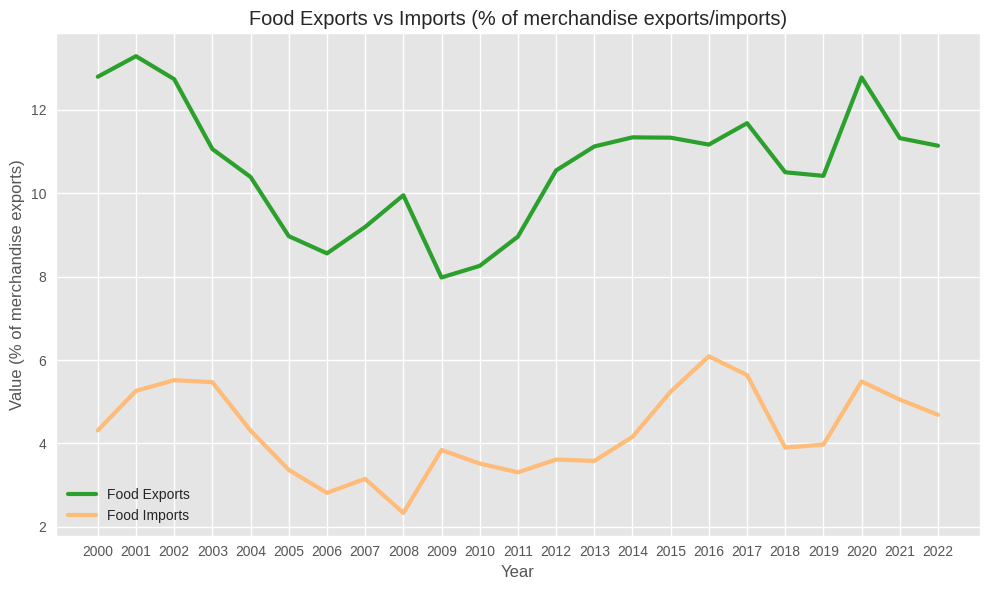

In [357]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df_food_exp.index, df_food_exp.values, color=COLORS[4], linewidth=3)
ax.plot(df_food_imp.index, df_food_imp.values, color=COLORS[3], linewidth=3)

ax.set_title(r'Food Exports vs Imports (% of merchandise exports/imports)')
ax.set_xlabel('Year')
ax.set_ylabel(r'Value (% of merchandise exports)')
ax.legend(['Food Exports', 'Food Imports'])

fig.tight_layout()
plt.show()

* Food exports are consistently higher than food imports, that means India is a net exporter of food
* We can see a significant increase in food exports as well as imports during 2019-2020, but exports increased more than imports
* We can see a significant decrease in food exports as well as imports after the pandemic in 2020

<p style="font-size:20px; color:#496595">Foreign direct investment, net inflows (BoP, current US$)</p>


In [358]:
df_fdi = df_stats_ind_no_null[df_stats_ind_no_null.series_name.eq(r"Foreign direct investment, net inflows (BoP, current US$)")].iloc[:, 4:].T.squeeze().astype(float)

/tmp/ipykernel_22997/1442202213.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.2f} B'.format(x/1000000000) for x in ax.get_yticks().tolist()])


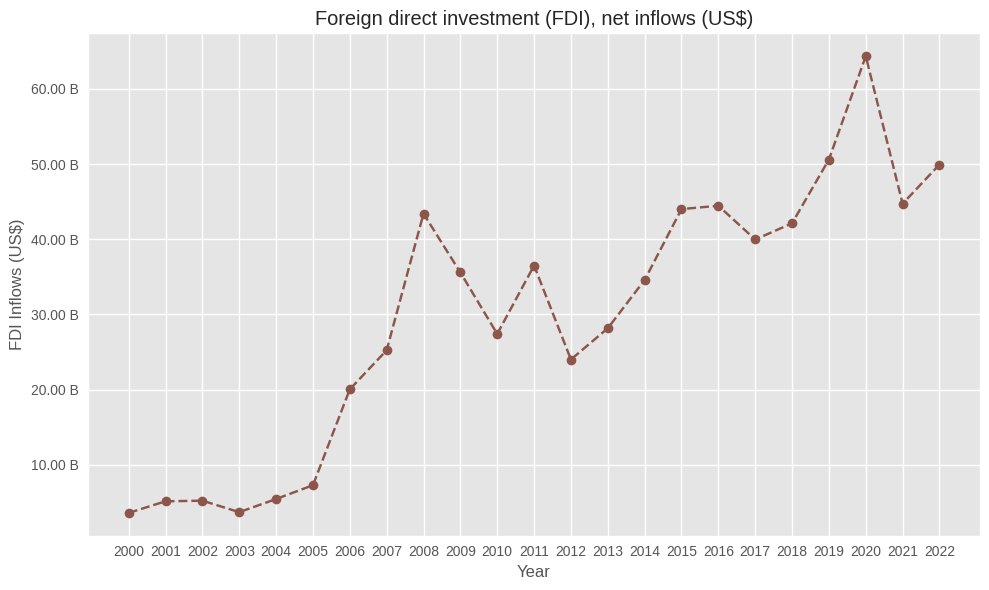

In [383]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_fdi.index, df_fdi.values, marker='o', linestyle='--', color=COLORS[10])
ax.set_title('Foreign direct investment (FDI), net inflows (US$)')
ax.set_xlabel('Year')
ax.set_ylabel('FDI Inflows (US$)')
ax.set_yticklabels(['{:.2f} B'.format(x/1000000000) for x in ax.get_yticks().tolist()])
fig.tight_layout()
plt.show()

* 2020 was the year when India received the most foreign direct investment
* We can see that the foreign direct investment fall significantly in 2021

<p style="font-size:20px; color:#496595">People using at least basic drinking water services (% of population)</p>

In [384]:
df_drink_water = df_stats_ind_no_null[df_stats_ind_no_null.series_name.eq(r"People using at least basic drinking water services (% of population)")].iloc[:, 4:].T.squeeze().astype(float)

/tmp/ipykernel_22997/2809469168.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.2f} %'.format(x) for x in ax.get_yticks().tolist()])


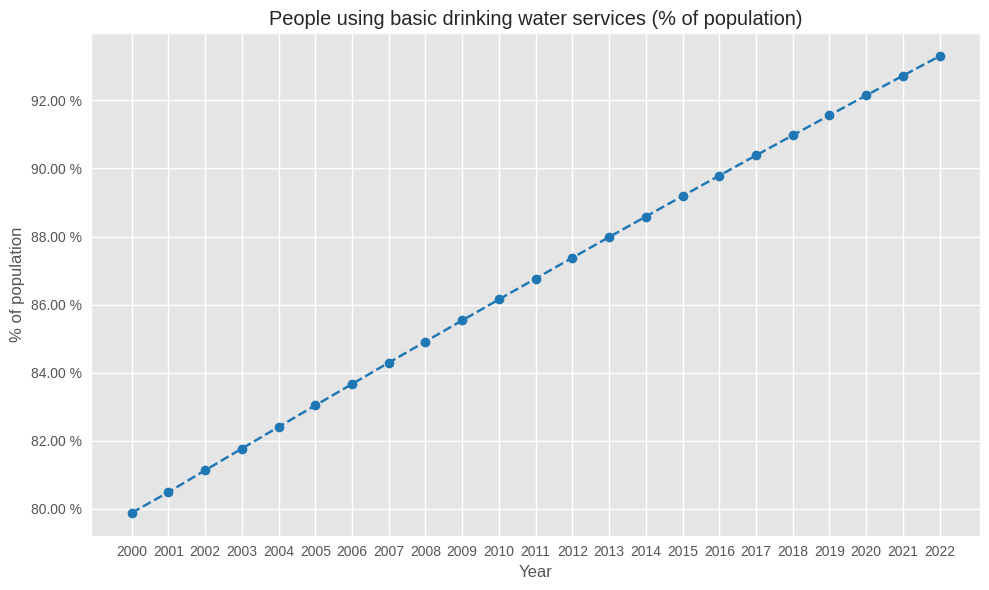

In [386]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_drink_water.index, df_drink_water.values, marker='o', linestyle='--', color=COLORS[0])
ax.set_title(r"People using basic drinking water services (% of population)")
ax.set_xlabel('Year')
ax.set_ylabel(r"% of population")
ax.set_yticklabels(['{:.2f} %'.format(x) for x in ax.get_yticks().tolist()])
fig.tight_layout()
plt.show()

* We can see that the percentage of people using at least basic drinking water services is consistently increasing, which is a good sign

<p style="font-size:20px; color:#496595">People practicing open defecation (% of population)</p>

In [387]:
df_open_def = df_stats_ind_no_null[df_stats_ind_no_null.series_name.eq(r"People practicing open defecation (% of population)")].iloc[:, 4:].T.squeeze().astype(float)

/tmp/ipykernel_22997/3335388613.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.2f} %'.format(x) for x in ax.get_yticks().tolist()])


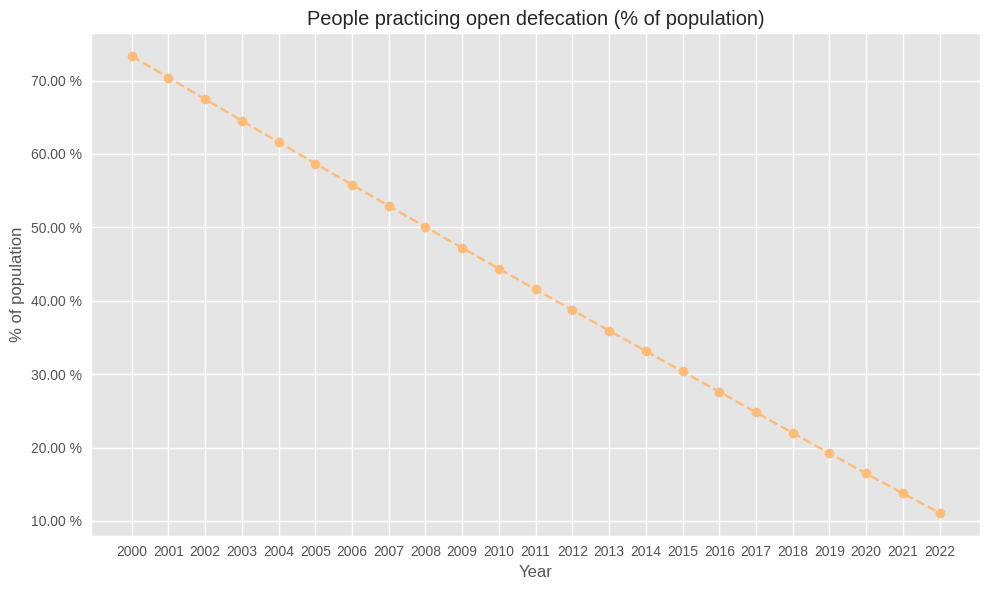

In [390]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_open_def.index, df_open_def.values, marker='o', linestyle='--', color=COLORS[3])
ax.set_title(r"People practicing open defecation (% of population)")
ax.set_xlabel('Year')
ax.set_ylabel(r"% of population")
ax.set_yticklabels(['{:.2f} %'.format(x) for x in ax.get_yticks().tolist()])
fig.tight_layout()
plt.show()

* We can see that the percentage of people practicing open defecation has consistently decreased since 2000, which is a good sign